# DATA-780: Classification (Part 1)

This classwork (CW) activity explores some of the concepts discussed in this introductory unit to classification problems. 

## Classification Problems (Supervised Learning)

Classification in machine learning is the process of predicting _discrete class labels_ for input data based on patterns learned from a labeled dataset. It involves training a model using examples where the correct categories are known, allowing the model to learn the relationship between input features and output classes. Once trained, the model can assign new, unseen data points to one of the predefined categories. The primary goal is to develop a model that accurately generalizes to new data, effectively **distinguishing between different classes** based on learned patterns.

### Logistic Regression

Logistic regression is a statistical method used for binary classification tasks. 

The core idea is to _model the probability that a given input point belongs to a particular class_. This is achieved by applying the logistic function, e.g., the sigmoid function, to a linear combination of input features. The logistic function compresses any real-valued number into a value between 0 and 1, which can be interpreted as a probability.

The algorithm estimates the parameters (weights) that best fit the data by _maximizing the likelihood_ of observing the given sample set. This is often done using optimization techniques like gradient descent. Once trained, the model computes the probability of the input belonging to a class, and a threshold (commonly 0.5) is used to make the final classification decision.

While it works well for linearly separable data, its performance may decline with more complex patterns unless combined with feature engineering or transformed into non-linear forms.

## Example: the Donner Party

In 1846, the Donner and Reed families left Springfield, Illinois, for California by covered wagon. In July, the [Donner Party](https://en.wikipedia.org/wiki/Donner_Party), as it became known, reached Fort Bridger, Wyoming. There its leaders decided to attempt a new and untested route to the Sacramento Valley. Having reached its full size of 87 people and 20 wagons, the party was delayed by a difficult crossing of the Wasatch Range and again in the crossing of the desert west of the Great Salt Lake. The group became stranded in the eastern Sierra Nevada mountains when the region was hit by heavy snows in late October. By the time the last survivor was rescued on April 21 1847, 40 of the 87 members had died from famine and exposure to extreme cold.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [27]:
# Read Donner party dataset
donner = pd.read_csv("https://github.com/reisanar/datasets/raw/master/donner.csv")

We fix the response variable:

In [28]:
# Change Status to binary (0 for Died, 1 for Survived)
donner['survived'] = (donner['Status'] == 'Survived').astype(int)

The code below is used to interpret `Sex` as a Categorical Variable:

In [29]:
le = LabelEncoder()
donner['Sex_encoded'] = le.fit_transform(donner['Sex'])

A quick exploratory data analysis is completed below:

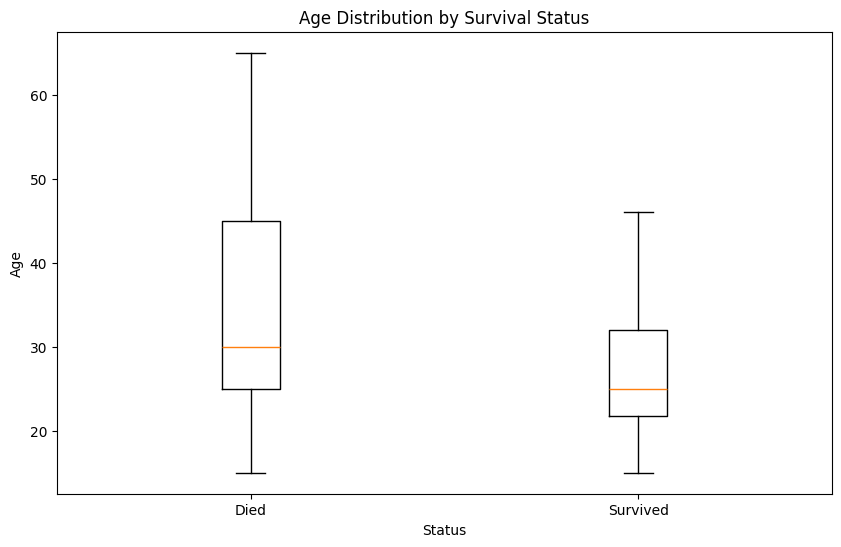

In [30]:
plt.figure(figsize=(10, 6))
plt.boxplot([donner[donner['Status'] == status]['Age'] for status in ['Died', 'Survived']])
plt.title('Age Distribution by Survival Status')
plt.xlabel('Status')
plt.ylabel('Age')
plt.xticks([1, 2], ['Died', 'Survived'])
plt.show()

In [31]:
# Summary of survival by sex
contingency = pd.crosstab(donner['Status'], donner['Sex'])
print(contingency)

Sex       Female  Male
Status                
Died           5    20
Survived      10    10


In [32]:
# Basic logistic regression model
X_age = donner['Age'].values.reshape(-1, 1)
y = donner['survived'].values

basic_lr = LogisticRegression(random_state=42)
basic_lr.fit(X_age, y)

LogisticRegression(random_state=42)

In [33]:
print("Basic Logistic Regression Model:")
print(f"Intercept: {basic_lr.intercept_[0]:.4f}")
print(f"Age Coefficient: {basic_lr.coef_[0][0]:.4f}")

Basic Logistic Regression Model:
Intercept: 1.8165
Age Coefficient: -0.0664


- The intercept represents the _log odds_ of survival for a party member with an age of 0. From this we can calculate the odds or probability.
- The slope indicates how much, for a unit increase in age (being 1 year older), will the _log odds ratio_ change. 


Probability Calculations are completed below: 

In [34]:
# Probability of survival for a newborn (Age = 0)
def predict_survival_prob(model, age):
    return model.predict_proba(np.array([[age]]))[0][1]

print("\nSurvival Probabilities:")
print(f"Newborn (Age 0): {predict_survival_prob(basic_lr, 0):.4f}")
print(f"25-year-old: {predict_survival_prob(basic_lr, 25):.4f}")
print(f"50-year-old: {predict_survival_prob(basic_lr, 50):.4f}")


Survival Probabilities:
Newborn (Age 0): 0.8601
25-year-old: 0.5390
50-year-old: 0.1819


Next, we build a second logistic regression model that considers all available attributes

In [35]:
# Build logistic regression model with both Age and Sex
X_full = donner[['Age', 'Sex_encoded']].values
full_lr = LogisticRegression(random_state=42)
full_lr.fit(X_full, y)

# Full model interpretation
print("\nFull Logistic Regression Model:")
print(f"Intercept: {full_lr.intercept_[0]:.4f}")
print(f"Age Coefficient: {full_lr.coef_[0][0]:.4f}")
print(f"Sex Coefficient: {full_lr.coef_[0][1]:.4f}")


Full Logistic Regression Model:
Intercept: 2.6623
Age Coefficient: -0.0716
Sex Coefficient: -1.0435


Below is a visualization of the survival probability

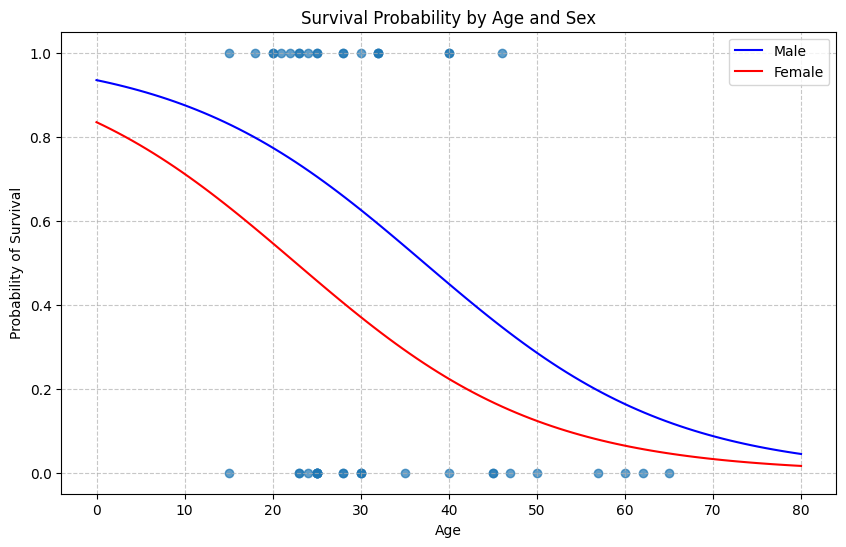

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(donner['Age'], donner['survived'], alpha=0.7)

# Prediction lines for males and females
age_range = np.linspace(0, 80, 100).reshape(-1, 1)
male_probs = full_lr.predict_proba(np.column_stack([age_range, np.zeros_like(age_range)]))[:, 1]
female_probs = full_lr.predict_proba(np.column_stack([age_range, np.ones_like(age_range)]))[:, 1]

plt.plot(age_range, male_probs, label='Male', color='blue')
plt.plot(age_range, female_probs, label='Female', color='red')

plt.title('Survival Probability by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Probability of Survival')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Some notes

#### Probability Calculation
- The logistic regression model uses the logit transformation:

$$
\log \left( \frac{p}{1 - p} \right) = \beta_0 + \beta_1 \text{Age} + \beta_2 \text{Sex}
$$

#### Coefficients Interpretation
- Intercept: Base log-odds of survival
- Age Coefficient: Negative value indicates decreasing survival probability with age
- Sex Coefficient: Positive value suggests higher survival probability for females

#### Conclusion
Both age and gender appear to have significant effects on survival in the Donner Party, with younger individuals and females having higher probabilities of survival.


## Example: binary classification on the `iris` dataset

We use the `datasets` package to load and return the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) into the object `iris`.

In [37]:
# Import `datasets` from `sklearn`
from sklearn import datasets
# Import the `numpy` library as `np`
import numpy as np

In [38]:
iris = datasets.load_iris()

The "data" attribute of the dataset stores the features of each sample flower. Here only the petal length and petal width features are considered. They are extracted and assigned to the feature matrix `X` below.

In [39]:
X = iris.data[:, [2, 3]]

The "target" attribute of the dataset stores the information about the class (label) of each sample.

In [40]:
y = iris.target

In [41]:
# Import the `train_test_split` function from scikit-learn's `cross_validation` module.
from sklearn.model_selection import train_test_split

# Split the data into 70% training data and 30% test data. 
# Used the random_state parameter for reproducibility of the initial shuffling of train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [42]:
# Import the `StandardScaler` class from scikit-learn's `preprocessing` module.
from sklearn.preprocessing import StandardScaler

In [43]:
# Train the scaler, which standarizes all the features to have mean=0 and unit variance.
sc = StandardScaler()
sc.fit(X_train)
# Apply the scaler to the X training data
X_train_std = sc.transform(X_train)
# Apply the SAME scaler to the X test data
X_test_std = sc.transform(X_test)

In [44]:
# Import the function `accuracy_score` from the `metrics` module.
from sklearn.metrics import accuracy_score

We first test with a logistic regression model

In [45]:
from sklearn.linear_model import LogisticRegression
# Set LogisticRegression’s regularization strength parameter (C) to a high value
lr = LogisticRegression(C=1000.0, random_state=0)


# Fit function to scaled training data and training target to create a model.
lr.fit(X_train_std, y_train)

# Apply the trained logistic regression on the X data to make predicts for the y test data.
y_predLr = lr.predict(X_test_std)

# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations).
print('Accuracy: %.2f' % accuracy_score(y_test, y_predLr))

Accuracy: 0.98
